#`import library`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#`read data`

In [ ]:
data = pd.read_excel('project33.xlsx', sheet_name = '18 Februari')
data.head(30)

#untuk running per tanggalnya tinggal diubah aja tanggal pada parameter sheet_name
#14 menjadi 15
#15 menjadi 16
#16 menjadi 17
#17 menjadi 18
#18 menjadi 19
#19 menjadi 20

,no,wi,vi
0,1.0,2.0,22.0
1,2.0,1.0,16.0
2,3.0,1.0,16.0
3,4.0,1.0,16.0
4,5.0,3.0,54.0
5,6.0,1.0,18.0
6,7.0,1.0,12.0
7,8.0,1.0,16.0
8,9.0,1.0,18.0
9,10.0,2.0,32.0


#`Greedy By Profit`

In [ ]:
def greedy_by_profit(data, var_weight, var_profit, Wmax):

  df = data.sort_values(var_profit, axis = 0, ascending = False)  
  df['cum_wi'] = df[var_weight].cumsum()                                                      
  Pmax = []

  for i in range(df.shape[0]):
    if df['cum_wi'][i] <= Wmax:
      Pmax.append(i)                              
  
  data_greedy = df.loc[Pmax].sort_values('cum_wi', axis = 0, ascending = True)
  last = data_greedy['cum_wi'].iloc[-1]
  add = Wmax-last
  
  a = df.index.tolist()
  b = data_greedy.index.tolist()
  c = [i for i in a if i not in b]
  
  if add > 0:
    for j in c:
      if df[var_weight][j] == add:
        Pmax.append(j)

  data_greedy = df.loc[Pmax]
  data_greedy['cum_wi'] = data_greedy[var_weight].cumsum()  
  data_greedy = data_greedy[data_greedy['cum_wi'] <= Wmax]
  data_greedy = data_greedy.sort_values('cum_wi', axis = 0, ascending = True)

  return data_greedy, sum(data_greedy[var_profit])                

In [ ]:
greedyprofit_data, greedyprofit_max = greedy_by_profit(data,'wi','vi',40)

#Max Gain by Profit 
greedyprofit_max

656.0

In [ ]:
#Data Gain by Profit
greedyprofit_data

,no,wi,vi,cum_wi
0,1.0,2.0,22.0,2.0
2,3.0,1.0,16.0,3.0
4,5.0,3.0,54.0,6.0
5,6.0,1.0,18.0,7.0
7,8.0,1.0,16.0,8.0
8,9.0,1.0,18.0,9.0
9,10.0,2.0,32.0,11.0
10,11.0,2.0,36.0,13.0
11,12.0,1.0,16.0,14.0
12,13.0,1.0,16.0,15.0


#`Greedy By Weight`

In [ ]:
def greedy_by_weight(data, var_weight, var_profit, Wmax):

  df = data.sort_values(by=[var_weight, var_profit], ascending=[True, False])                          
  df['cum_wi'] = df[var_weight].cumsum()                                
  Pmax = []

  for i in range(df.shape[0]):
    if df['cum_wi'][i] <= Wmax:
      Pmax.append(i)                              
  
  data_greedy = df.loc[Pmax].sort_values('cum_wi', axis = 0, ascending = True)
  last = data_greedy['cum_wi'].iloc[-1].astype(int) 
  add = Wmax-last
  
  a = df.index.tolist()
  b = data_greedy.index.tolist()
  c = [i for i in a if i not in b]

  if add > 0:
    for j in c:
      if df[var_weight][j] == add:
        Pmax.append(j)

  data_greedy = df.loc[Pmax]
  data_greedy['cum_wi'] = data_greedy[var_weight].cumsum()  
  data_greedy = data_greedy[data_greedy['cum_wi'] <= Wmax]
  data_greedy = data_greedy.sort_values('cum_wi', axis = 0, ascending = True)
                              
  return data_greedy, sum(data_greedy[var_profit])                      

In [ ]:
greedyweight_data, greedyweight_max = greedy_by_weight(data,'wi','vi',40)

#Max Gain by Weight
greedyweight_max

636.0

In [ ]:
#Data Gain by Weight
greedyweight_data

,no,wi,vi,cum_wi
0,1.0,2.0,22.0,2.0
1,2.0,1.0,16.0,3.0
2,3.0,1.0,16.0,4.0
3,4.0,1.0,16.0,5.0
4,5.0,3.0,54.0,8.0
5,6.0,1.0,18.0,9.0
6,7.0,1.0,12.0,10.0
7,8.0,1.0,16.0,11.0
8,9.0,1.0,18.0,12.0
9,10.0,2.0,32.0,14.0


#`Greedy By Density`

In [ ]:
def greedy_by_density(data, var_weight, var_profit, Wmax):

  df = data
  df['pi_item'] = df[var_profit]/df[var_weight]                               #membuat variabel baru Density
  df = df.sort_values(by=['pi_item', var_profit], ascending=[False, False])                               #mengurutkan berdasarkan Density
  df['cum_wi'] = df[var_weight].cumsum()                                      #frekuensi kumulatif bobot
  Pmax = []

  for i in range(df.shape[0]):
    if df['cum_wi'][i] <= Wmax:
      Pmax.append(i)                              
  
  data_greedy = df.loc[Pmax].sort_values('cum_wi', axis = 0, ascending = True)
  last = data_greedy['cum_wi'].iloc[-1].astype(int) 
  add = Wmax-last
  
  a = df.index.tolist()
  b = data_greedy.index.tolist()
  c = [i for i in a if i not in b]

  if add > 0:
    for j in c:
      if df[var_weight][j] == add:
        Pmax.append(j)

  data_greedy = df.loc[Pmax]
  data_greedy['cum_wi'] = data_greedy[var_weight].cumsum()  
  data_greedy = data_greedy[data_greedy['cum_wi'] <= Wmax]
  data_greedy = data_greedy.sort_values('cum_wi', axis = 0, ascending = True)
  
  return data_greedy, sum(data_greedy[var_profit])                       

In [ ]:
greedydensity_data, greedydensity_max = greedy_by_density(data,'wi','vi',40)

# Max Gain by Density
greedydensity_max

666.0

In [ ]:
#Data Gain by Density
greedydensity_data

,no,wi,vi,pi_item,cum_wi
1,2.0,1.0,16.0,16.0,1.0
2,3.0,1.0,16.0,16.0,2.0
3,4.0,1.0,16.0,16.0,3.0
4,5.0,3.0,54.0,18.0,6.0
5,6.0,1.0,18.0,18.0,7.0
7,8.0,1.0,16.0,16.0,8.0
8,9.0,1.0,18.0,18.0,9.0
9,10.0,2.0,32.0,16.0,11.0
10,11.0,2.0,36.0,18.0,13.0
11,12.0,1.0,16.0,16.0,14.0


#`Plotting Gain 14 Feb - 20 Feb`

`From Table Word [label Terambil]`

In [ ]:
profit_week_max = [502,464,500,532,496,486,499]
#profit_week_wmx = [30,30,30,30,30,30,30]

weight_week_max = [589,510,492,510,480,482,533]
#weight_week_wmx = [30,29,30,30,29,29,29]

density_week_max = [589,530,506,540,506,508,551]
#density_week_wmx = [30,30,30,30,30,30,30]

tgl = ['14/02/2022','15/02/2022','16/02/2022','17/02/2022','18/02/2022','19/02/2022','20/02/2022']

dataframe = pd.DataFrame(list(zip(tgl, profit_week_max, weight_week_max, density_week_max)),
                         columns=['tanggal', 'profit_week_max', 'weight_week_max', 'density_week_max'])

dataframe['tanggal'] = pd.to_datetime(dataframe['tanggal'], format="%d/%m/%Y")

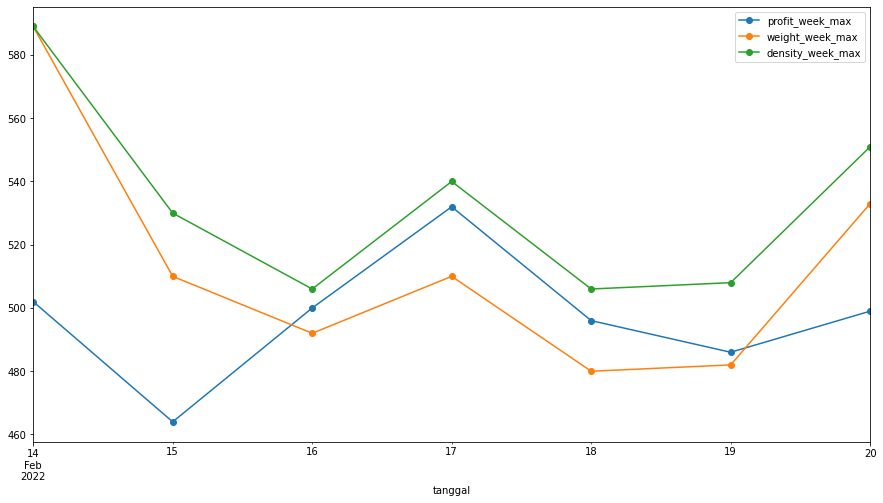

In [ ]:
dataframe.plot(kind='line', x='tanggal', y=['profit_week_max', 'weight_week_max', 'density_week_max'],
               style='o-', figsize=(15,8))
plt.show()